In [2]:
% load_ext autoreload
% autoreload 2

import sys
import logging
logging.basicConfig(stream=sys.stdout, level=logging.getLevelName('DEBUG'))


## Models

In [1]:
% env MKL_THREADING_LAYER=GNU
models = ['skip-thoughts', 'lm_1b', 'rntn']


env: MKL_THREADING_LAYER=GNU


## Naturalistic Stories

skip-thoughts
DEBUG:neural_nlp.utils.store:Loading from storage: /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../output/neural_nlp.models.get_activations/model_name=skip-thoughts,stimulus_set_name=naturalistic.Boar.pkl


lm_1b
DEBUG:neural_nlp.utils.store:Loading from storage: /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../output/neural_nlp.models.get_activations/model_name=lm_1b,stimulus_set_name=naturalistic.Boar.pkl


rntn
DEBUG:neural_nlp.utils.store:Loading from storage: /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../output/neural_nlp.models.get_activations/model_name=rntn,stimulus_set_name=naturalistic.Boar.pkl


/home/martin/miniconda3/envs/neural-nlp/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


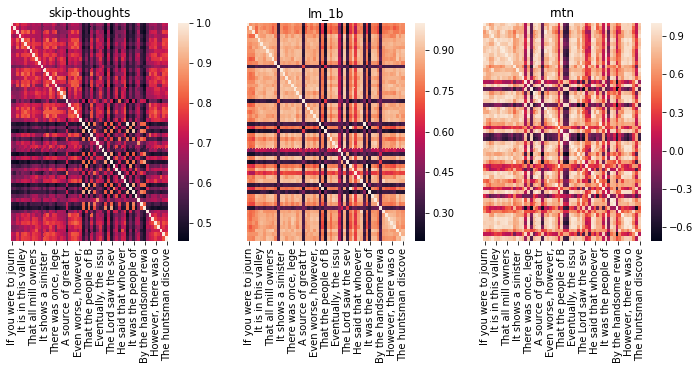

In [5]:
% matplotlib inline

import seaborn
from matplotlib import pyplot

from neural_nlp.models import get_activations
from neural_nlp.stimuli import load_stimuli
from mkgu.metrics.rdm import RSA

def plot_rsa(dataset_name):
    labels = load_stimuli(dataset_name)
    labels = [label[:20] for label in labels]
    fig, axes = pyplot.subplots(1, len(models), figsize=(12, 4))
    for i, model_name in enumerate(models):
        ax = axes[i]
        print(model_name)
        ax.set_title(model_name)
        encodings = get_activations(model_name, dataset_name)  # feed in sentences in context, i.e. with continuity
        similarities = RSA()(encodings)
        seaborn.heatmap(similarities, ax=ax)
        ax.set_xticklabels(labels, rotation=90)
        ax.get_yaxis().set_visible(False)
    pyplot.savefig('results/RSA-{}.svg'.format(dataset_name))
    pyplot.savefig('results/RSA-{}.png'.format(dataset_name))
    fig.show()

plot_rsa('naturalistic.Boar')
